In [3]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv("employee_data.csv")

# Check for missing values
print(df.isnull().sum())

# Fill missing values
df["Age"].fillna(df["Age"].mean(), inplace=True)
df["Department"].replace("", "Unknown", inplace=True)  # empty string -> Unknown

# Drop rows with too many missing values (less than 3 non-null values)
df.dropna(thresh=3, inplace=True)

# Display cleaned dataset
print(df.head())


ID            0
Name          0
Age           1
Salary        0
Department    1
dtype: int64
   ID         Name   Age  Salary Department
0   1     John Doe  25.0   50000         IT
1   2   jane smith  52.6   45000         HR
2   3  Bob Johnson  35.0    -999         IT
3   4  Alice Brown  28.0   52000    Finance
4   5     John Doe  25.0   50000         IT


C:\Users\Himanshu Sardana\AppData\Local\Temp\ipykernel_10172\3242524183.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].mean(), inplace=True)
C:\Users\Himanshu Sardana\AppData\Local\Temp\ipykernel_10172\3242524183.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [4]:
# Check for duplicates
print(f"Duplicates found: {df.duplicated().sum()}")

# Remove exact duplicate rows
df.drop_duplicates(inplace=True)

# Remove duplicates based on specific columns (Name + Age)
df.drop_duplicates(subset=["Name", "Age"], inplace=True)

# Display cleaned dataset
print(df.head())


Duplicates found: 0
   ID           Name    Age  Salary Department
0   1       John Doe   25.0   50000         IT
1   2     jane smith   52.6   45000         HR
2   3    Bob Johnson   35.0    -999         IT
3   4    Alice Brown   28.0   52000    Finance
5   6  Charlie Davis  150.0   48000        NaN


In [5]:
# Using IQR method to detect outliers in Salary
Q1 = df["Salary"].quantile(0.25)
Q3 = df["Salary"].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df["Salary"] >= lower_bound) & (df["Salary"] <= upper_bound)]

# Display cleaned dataset
print(df.head())


   ID           Name    Age  Salary Department
0   1       John Doe   25.0   50000         IT
1   2     jane smith   52.6   45000         HR
3   4    Alice Brown   28.0   52000    Finance
5   6  Charlie Davis  150.0   48000        NaN


In [6]:
# Fill NaN in Department with "Unknown"
df["Department"] = df["Department"].fillna("Unknown")

In [7]:
df.head

<bound method NDFrame.head of    ID           Name    Age  Salary Department
0   1       John Doe   25.0   50000         IT
1   2     jane smith   52.6   45000         HR
3   4    Alice Brown   28.0   52000    Finance
5   6  Charlie Davis  150.0   48000    Unknown>

In [8]:
print(df.head())

   ID           Name    Age  Salary Department
0   1       John Doe   25.0   50000         IT
1   2     jane smith   52.6   45000         HR
3   4    Alice Brown   28.0   52000    Finance
5   6  Charlie Davis  150.0   48000    Unknown


In [9]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Load dataset
df = pd.read_csv("sample_scaling_dataset.csv")
print("Original Data:\n", df, "\n")

# =========================
# 1. Min-Max Scaling
# =========================
minmax_scaler = MinMaxScaler()
X_minmax = minmax_scaler.fit_transform(df)

print("Min-Max Scaled Data:\n", pd.DataFrame(X_minmax, columns=df.columns), "\n")

# =========================
# 2. Z-Score Standardization
# =========================
standard_scaler = StandardScaler()
X_standard = standard_scaler.fit_transform(df)

print("Z-Score Standardized Data:\n", pd.DataFrame(X_standard, columns=df.columns), "\n")

# =========================
# 3. Robust Scaling
# =========================
robust_scaler = RobustScaler()
X_robust = robust_scaler.fit_transform(df)

print("Robust Scaled Data:\n", pd.DataFrame(X_robust, columns=df.columns))



Original Data:
    Feature1  Feature2  Feature3
0        10       100         5
1        20       200         7
2        30       300         9
3        40       400        11
4        50       500        13 

Min-Max Scaled Data:
    Feature1  Feature2  Feature3
0      0.00      0.00      0.00
1      0.25      0.25      0.25
2      0.50      0.50      0.50
3      0.75      0.75      0.75
4      1.00      1.00      1.00 

Z-Score Standardized Data:
    Feature1  Feature2  Feature3
0 -1.414214 -1.414214 -1.414214
1 -0.707107 -0.707107 -0.707107
2  0.000000  0.000000  0.000000
3  0.707107  0.707107  0.707107
4  1.414214  1.414214  1.414214 

Robust Scaled Data:
    Feature1  Feature2  Feature3
0      -1.0      -1.0      -1.0
1      -0.5      -0.5      -0.5
2       0.0       0.0       0.0
3       0.5       0.5       0.5
4       1.0       1.0       1.0


In [12]:

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Apply scalers
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()

df_minmax = pd.DataFrame(minmax_scaler.fit_transform(df), columns=df.columns)
df_standard = pd.DataFrame(standard_scaler.fit_transform(df), columns=df.columns)
df_robust = pd.DataFrame(robust_scaler.fit_transform(df), columns=df.columns)

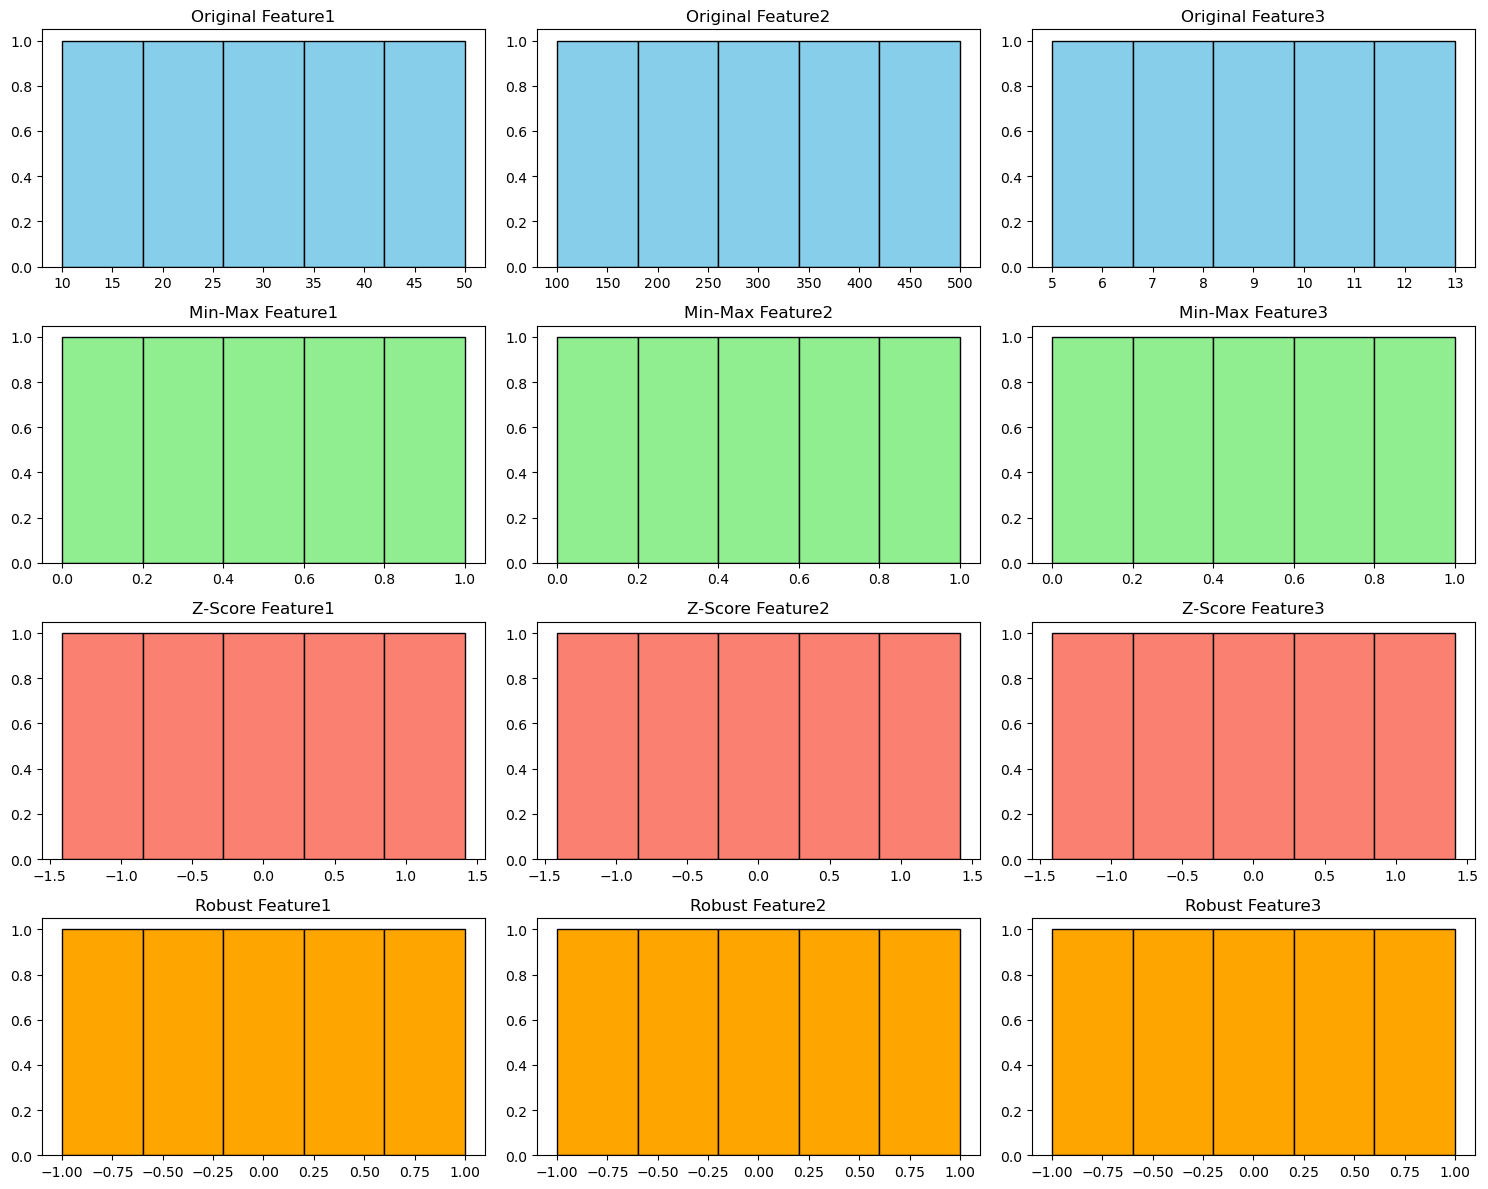

C:\Users\Himanshu Sardana\AppData\Local\Temp\ipykernel_10172\2024232751.py:34: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(df.values, labels=df.columns)
C:\Users\Himanshu Sardana\AppData\Local\Temp\ipykernel_10172\2024232751.py:37: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot(df_minmax.values, labels=df.columns)
C:\Users\Himanshu Sardana\AppData\Local\Temp\ipykernel_10172\2024232751.py:40: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[2].boxplot(df_standard.values, labels=df.columns)
C:\Users\Himanshu Sardana\AppData\Local\Temp\ipykernel_10172\2024232751.py:43: MatplotlibDepreca

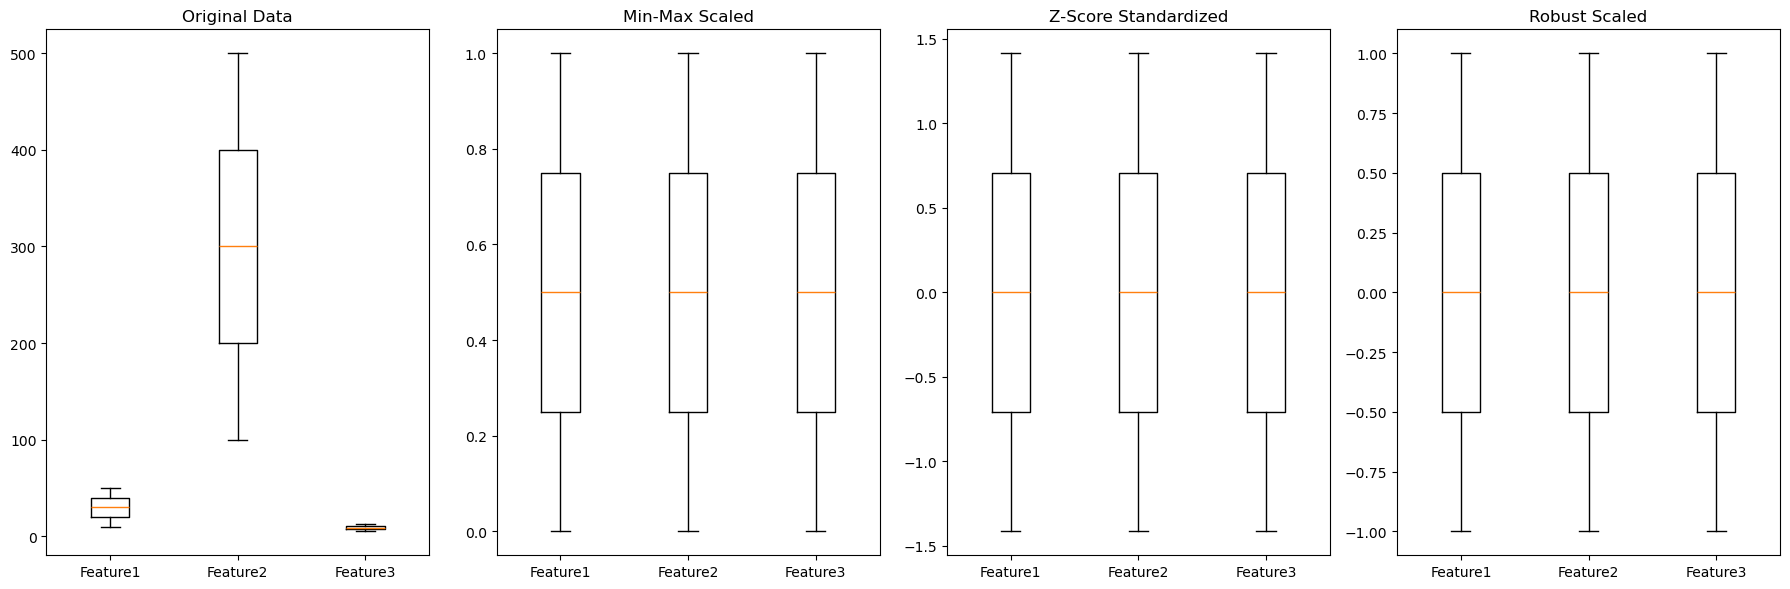

In [13]:
# -----------------------------
# 1. Histograms before/after
# -----------------------------
fig, axes = plt.subplots(4, 3, figsize=(15, 12))

# Original distributions
for i, col in enumerate(df.columns):
    axes[0, i].hist(df[col], bins=5, color="skyblue", edgecolor="black")
    axes[0, i].set_title(f"Original {col}")

# Min-Max Scaling
for i, col in enumerate(df.columns):
    axes[1, i].hist(df_minmax[col], bins=5, color="lightgreen", edgecolor="black")
    axes[1, i].set_title(f"Min-Max {col}")

# Z-Score Standardization
for i, col in enumerate(df.columns):
    axes[2, i].hist(df_standard[col], bins=5, color="salmon", edgecolor="black")
    axes[2, i].set_title(f"Z-Score {col}")

# Robust Scaling
for i, col in enumerate(df.columns):
    axes[3, i].hist(df_robust[col], bins=5, color="orange", edgecolor="black")
    axes[3, i].set_title(f"Robust {col}")

plt.tight_layout()
plt.show()

# -----------------------------
# 2. Boxplots before/after
# -----------------------------
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

axes[0].boxplot(df.values, labels=df.columns)
axes[0].set_title("Original Data")

axes[1].boxplot(df_minmax.values, labels=df.columns)
axes[1].set_title("Min-Max Scaled")

axes[2].boxplot(df_standard.values, labels=df.columns)
axes[2].set_title("Z-Score Standardized")

axes[3].boxplot(df_robust.values, labels=df.columns)
axes[3].set_title("Robust Scaled")

plt.tight_layout()
plt.show()

In [ ]:
# Here’s the visualization ✅

# Row 1 (Blue): Original features (different ranges, unscaled).

# Row 2 (Green): Min-Max Scaling compresses values between 0–1. Works best when you want bounded features (e.g., neural networks).

# Row 3 (Red): Z-Score Standardization centers data at mean 0 with std 1. Best for algorithms assuming Gaussian distribution (e.g., regression, PCA, SVM).

# Row 4 (Orange): Robust Scaling uses median & IQR, making it resistant to outliers. Best when data has extreme values.

# 👉 For your dataset (clean, evenly spaced, no extreme outliers):

# Min-Max and Z-Score give very stable transformations.

# Robust Scaling is less impactful here since there are no strong outliers, but would be very useful if values like 1000 suddenly appeared in Feature2.

In [15]:
df1 = pd.read_csv("encoding_sample_dataset.csv")
print(df1)

   ID     Name Department    Education  Salary
0   1    Alice         IT     Bachelor   50000
1   2      Bob         HR       Master   60000
2   3  Charlie    Finance          PhD   75000
3   4    David         IT  High School   40000
4   5      Eva  Marketing     Bachelor   65000


In [21]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
import joblib

# Load your CSV data
df1 = pd.read_csv('encoding_sample_dataset.csv')

# 1. One-Hot Encoding for Department
df1_encoded = pd.get_dummies(df1, columns=['Department'])

# OR using scikit-learn's OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(df1[['Department']])
# Optionally, add these features to df1 if needed

# 2. Label Encoding and Ordinal Encoding for Education
le = LabelEncoder()
df1['Education_LabelEncoded'] = le.fit_transform(df1['Education'])

# For ordinal relationships in Education
education_levels = ['High School', 'Bachelor', 'Master', 'PhD']
ordinal_encoder = OrdinalEncoder(categories=[education_levels])
df1['Education_OrdinalEncoded'] = ordinal_encoder.fit_transform(df1[['Education']])

# 3. Handling New Categories
# Save label encoder
joblib.dump(le, 'label_encoder.pkl')

# Load encoder and transform new category (raises error if unseen)
loaded_encoder = joblib.load('label_encoder.pkl')
try:
    new_encoded = loaded_encoder.transform(['New Category'])
except ValueError:
    print("Unknown category encountered!")

# Preview the DataFrame
print(df1.head())


Unknown category encountered!
   ID     Name Department    Education  Salary  Education_LabelEncoded  \
0   1    Alice         IT     Bachelor   50000                       0   
1   2      Bob         HR       Master   60000                       2   
2   3  Charlie    Finance          PhD   75000                       3   
3   4    David         IT  High School   40000                       1   
4   5      Eva  Marketing     Bachelor   65000                       0   

   Education_OrdinalEncoded  
0                       1.0  
1                       2.0  
2                       3.0  
3                       0.0  
4                       1.0  
